## **Eduardo Carrasco Vidal** <img src="img/logo.png" align="right" style="width: 120px;"/>

**Doctorado en Ingeniería de Sistemas Complejos, Universidad Adolfo Ibáñez.**

**Profesor:** Gonzalo Ruz Heredia.
__Ayudante:__ Carlos Sepúlveda Morales.

**Curso:** Machine Learning (Aprendizaje Automático).

Enlace al repositorio del alumno en [GitHub](https://github.com/educarrascov/DISC_MachineLearning) _@educarrascov_

![Python](https://img.shields.io/badge/python-%2314354C.svg) 

## Instrucciones
* La tarea es individual
* Por favor responder en este mismo notebook
* Renombrar el archivo agregando su nombre, por ejemplo tarea3_Contreras_Almada.ipynb
* Subir el archivo al link de entrega Trabajo en webcursos que será habilitado
* __Fecha de entrega:__ viernes 7 de octubre, 23:55 hrs.

# Tarea Nº 3: Machine Learning.

Considere el dataset CallCenterData de la [publicación](https://www.sciencedirect.com/science/article/abs/pii/S0957417412004605) vista en clase.

In [1]:
# se efectúa la carga de la base de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt 
from matplotlib.pyplot import figure
df = pd.read_csv('data/CallCenterData.csv', sep=',')

In [2]:
df.shape

(660, 11)

In [3]:
df.info() #verificar cantidad de columnas/filas, tipos de variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          660 non-null    int64  
 1   Edad                        660 non-null    int64  
 2   Sexo                        660 non-null    object 
 3   NivelEducacion              660 non-null    object 
 4   EstadoCivil                 660 non-null    object 
 5   NivelSocEco                 660 non-null    object 
 6   HorasLogeadas               660 non-null    float64
 7   HorasHabladas               660 non-null    float64
 8   ContactosEfectivosPromedio  660 non-null    float64
 9   RegistrosTerminados         660 non-null    float64
 10  ProdMayorUbral              660 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 56.8+ KB


Como se observa, el detalle de las variables es el siguiente:
1. **Numéricas:** `ID`, `Edad`, `HorasLogeadas`, `HorasHabladas`, `ContactosEfectivosPromedio`, `RegistrosTerminados`.
2. **Categóricas:** `Sexo`, `NivelEducacion`, `EstadoCivil`, `NivelSocEco`, `ProdMayorUbral`.

Todas tienen la misma cantidad de datos (660), sin presentar ninguno nulo.

In [4]:
df.head()

,ID,Edad,Sexo,NivelEducacion,EstadoCivil,NivelSocEco,HorasLogeadas,HorasHabladas,ContactosEfectivosPromedio,RegistrosTerminados,ProdMayorUbral
0,1,32,m,un,s,c3c4,151.1525,45.8525,192.25,591.75,si
1,2,24,m,em,s,c3c4,71.1800,24.7600,1.00,501.00,no
2,3,29,m,em,c,c3c4,120.5600,49.4500,156.00,993.00,si
3,4,48,f,em,c,e,90.8500,28.8500,442.00,569.00,no
4,5,25,m,un,s,c3c4,190.1800,41.1600,0.00,0.00,si


In [5]:
df.describe(include='all')

,ID,Edad,Sexo,NivelEducacion,EstadoCivil,NivelSocEco,HorasLogeadas,HorasHabladas,ContactosEfectivosPromedio,RegistrosTerminados,ProdMayorUbral
count,660.000000,660.000000,660,660,660,660,660.000000,660.000000,660.000000,660.000000,660
unique,NaN,NaN,2,4,2,5,NaN,NaN,NaN,NaN,2
top,NaN,NaN,f,em,s,c3c4,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,340,345,489,386,NaN,NaN,NaN,NaN,351
mean,330.500000,32.034848,NaN,NaN,NaN,NaN,117.025260,41.113746,192.477960,467.773235,NaN
std,190.669872,8.970209,NaN,NaN,NaN,NaN,53.348341,25.310637,146.711340,312.863798,NaN
min,1.000000,19.000000,NaN,NaN,NaN,NaN,0.170000,0.013333,0.000000,0.000000,NaN
25%,165.750000,26.000000,NaN,NaN,NaN,NaN,79.197125,21.767312,84.625000,231.107143,NaN
50%,330.500000,29.500000,NaN,NaN,NaN,NaN,122.679417,37.665000,181.000000,440.500000,NaN
75%,495.250000,36.000000,NaN,NaN,NaN,NaN,160.650250,57.709000,270.558333,645.812500,NaN


Convierta los atributos categóricos a númericos

In [6]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables

The categorical variables are :

 ['Sexo', 'NivelEducacion', 'EstadoCivil', 'NivelSocEco', 'ProdMayorUbral']


In [7]:
# check missing values in categorical variables
df[categorical].isnull().sum()

Sexo              0
NivelEducacion    0
EstadoCivil       0
NivelSocEco       0
ProdMayorUbral    0
dtype: int64

In [8]:
# check for cardinality in categorical variables
for var in categorical:  
    print(var, ' contiene ', len(df[var].unique()), ' etiquetas')

Sexo  contiene  2  etiquetas
NivelEducacion  contiene  4  etiquetas
EstadoCivil  contiene  2  etiquetas
NivelSocEco  contiene  5  etiquetas
ProdMayorUbral  contiene  2  etiquetas


In [9]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['ID', 'Edad', 'HorasLogeadas', 'HorasHabladas', 'ContactosEfectivosPromedio', 'RegistrosTerminados']


In [10]:
# check missing values in numerical variables
df[numerical].isnull().sum()

ID                            0
Edad                          0
HorasLogeadas                 0
HorasHabladas                 0
ContactosEfectivosPromedio    0
RegistrosTerminados           0
dtype: int64

In [11]:
X = df.drop(['ProdMayorUbral','ID'], axis=1)

In [12]:
X.shape

(660, 9)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        660 non-null    int64  
 1   Sexo                        660 non-null    object 
 2   NivelEducacion              660 non-null    object 
 3   EstadoCivil                 660 non-null    object 
 4   NivelSocEco                 660 non-null    object 
 5   HorasLogeadas               660 non-null    float64
 6   HorasHabladas               660 non-null    float64
 7   ContactosEfectivosPromedio  660 non-null    float64
 8   RegistrosTerminados         660 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 46.5+ KB


In [14]:
def get_ohe(X):
    temp_df = pd.DataFrame(data=ohe.transform(X[['Sexo','NivelEducacion','EstadoCivil','NivelSocEco']]), columns=ohe.get_feature_names_out())
    X.drop(columns=['Sexo','NivelEducacion','EstadoCivil','NivelSocEco'], axis=1, inplace=True)
    X = pd.concat([X.reset_index(drop=True), temp_df], axis=1)
    return X

In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype='int')
ohe.fit(X[['Sexo','NivelEducacion','EstadoCivil','NivelSocEco']])
X = get_ohe(X)

In [16]:
X.shape

(660, 18)

In [17]:
X.head(5)

,Edad,HorasLogeadas,HorasHabladas,ContactosEfectivosPromedio,RegistrosTerminados,Sexo_f,Sexo_m,NivelEducacion_em,NivelEducacion_sec,NivelEducacion_ts,NivelEducacion_un,EstadoCivil_c,EstadoCivil_s,NivelSocEco_abc1,NivelSocEco_c2,NivelSocEco_c3c4,NivelSocEco_e,NivelSocEco_fue
0,32,151.1525,45.8525,192.25,591.75,0,1,0,0,0,1,0,1,0,0,1,0,0
1,24,71.1800,24.7600,1.00,501.00,0,1,1,0,0,0,0,1,0,0,1,0,0
2,29,120.5600,49.4500,156.00,993.00,0,1,1,0,0,0,1,0,0,0,1,0,0
3,48,90.8500,28.8500,442.00,569.00,1,0,1,0,0,0,1,0,0,0,0,1,0
4,25,190.1800,41.1600,0.00,0.00,0,1,0,0,0,1,0,1,0,0,1,0,0


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        660 non-null    int64  
 1   HorasLogeadas               660 non-null    float64
 2   HorasHabladas               660 non-null    float64
 3   ContactosEfectivosPromedio  660 non-null    float64
 4   RegistrosTerminados         660 non-null    float64
 5   Sexo_f                      660 non-null    int64  
 6   Sexo_m                      660 non-null    int64  
 7   NivelEducacion_em           660 non-null    int64  
 8   NivelEducacion_sec          660 non-null    int64  
 9   NivelEducacion_ts           660 non-null    int64  
 10  NivelEducacion_un           660 non-null    int64  
 11  EstadoCivil_c               660 non-null    int64  
 12  EstadoCivil_s               660 non-null    int64  
 13  NivelSocEco_abc1            660 non

Codifique la variable de salida ProdMayorUbral, utilice: etiqueta __si__ codificada como 1, y etiqueta __no__ como 0.

In [19]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['ProdMayorUbral'] = lb.fit_transform(df['ProdMayorUbral'])
y = df['ProdMayorUbral']

In [20]:
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: ProdMayorUbral, dtype: int64

Genere una partición 70% para entrenamiento y el 30% restante para prueba

In [21]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 218)

In [22]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((462, 18), (198, 18))

## Pregunta 1
Entrene un clasificador naive Bayes usando sólo los atributos socio-demográficos. Luego evalúe en el conjunto de prueba generando el classification report.

### Respuesta:

In [23]:
X_train1 = X_train.iloc[:,[0,5,6,7,8,9,10,11,12,13,14,15,16,17]].copy()
X_test1 = X_test.iloc[:,[0,5,6,7,8,9,10,11,12,13,14,15,16,17]].copy()

In [24]:
X_train1

,Edad,Sexo_f,Sexo_m,NivelEducacion_em,NivelEducacion_sec,NivelEducacion_ts,NivelEducacion_un,EstadoCivil_c,EstadoCivil_s,NivelSocEco_abc1,NivelSocEco_c2,NivelSocEco_c3c4,NivelSocEco_e,NivelSocEco_fue
563,36,0,1,1,0,0,0,1,0,0,0,1,0,0
102,28,1,0,0,0,0,1,0,1,0,0,1,0,0
158,27,1,0,1,0,0,0,0,1,0,0,1,0,0
55,21,1,0,1,0,0,0,0,1,0,1,0,0,0
85,22,0,1,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,29,1,0,1,0,0,0,0,1,0,0,1,0,0
440,37,0,1,1,0,0,0,0,1,0,0,1,0,0
398,41,1,0,1,0,0,0,0,1,0,0,1,0,0
358,23,1,0,1,0,0,0,0,1,0,0,1,0,0


In [27]:
from sklearn.naive_bayes import GaussianNB
model_sociodem = GaussianNB()
score = []
model_sociodem.fit(X_train1,y_train)

GaussianNB()

In [28]:
from sklearn.metrics import accuracy_score,r2_score as r2
from sklearn.metrics import classification_report, plot_confusion_matrix

predicciones_sociodem = model_sociodem.predict(X_test1)
accuracy_sociodem = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_sociodem,
            normalize = True
           )
print(f"El porcentaje de clasificaciones correctas para el NB de Variables Socio Demográficas es: {round(100 * accuracy_sociodem,2)} %")
score.append(round(100 * accuracy_sociodem,2))

El porcentaje de clasificaciones correctas para el NB de Variables Socio Demográficas es: 55.56 %


In [29]:
print(classification_report(y_test, predicciones_sociodem))

              precision    recall  f1-score   support

           0       0.55      0.82      0.66       104
           1       0.57      0.27      0.36        94

    accuracy                           0.56       198
   macro avg       0.56      0.54      0.51       198
weighted avg       0.56      0.56      0.52       198



In [30]:
from sklearn.metrics import confusion_matrix
cf_matrix_1 = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones_sociodem)
print(cf_matrix_1)

[[85 19]
 [69 25]]


<AxesSubplot:>

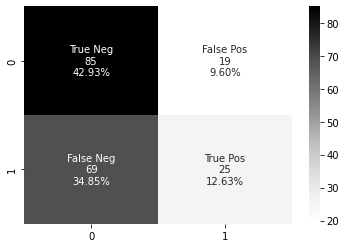

In [31]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_1.flatten()/np.sum(cf_matrix_1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_1, annot=labels, fmt='', cmap='Greys')

## Pregunta 2
Lo mismo que la pregunta anterior pero usando sólo los atributos operacionales. Mejora el desempeño? argumente en función de las métricas de desempeño.

### Respuesta:

In [32]:
X_train2 = X_train.iloc[:,[1,2,3,4]].copy()
X_test2 = X_test.iloc[:,[1,2,3,4]].copy()

In [33]:
X_train2

,HorasLogeadas,HorasHabladas,ContactosEfectivosPromedio,RegistrosTerminados
563,14.496286,2.922143,30.142857,48.428571
102,64.100000,12.475000,74.000000,139.500000
158,38.000000,10.400000,0.000000,0.000000
55,58.830000,21.440000,150.000000,522.000000
85,58.000000,13.870000,55.000000,421.000000
...,...,...,...,...
100,66.275000,10.080000,61.500000,142.500000
440,120.836667,52.815000,269.500000,542.500000
398,185.323000,45.380000,334.700000,645.500000
358,157.459500,32.657750,100.500000,184.250000


In [34]:
from sklearn.naive_bayes import GaussianNB
model_operacionales = GaussianNB()
score = []
model_operacionales.fit(X_train2,y_train)

GaussianNB()

In [35]:
predicciones_operacionales = model_operacionales.predict(X_test2)
accuracy_operacionales = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_operacionales,
            normalize = True
           )
print(f"El porcentaje de clasificaciones correctas para el NB de Variables Operacionales es: {round(100 * accuracy_operacionales,2)} %")
score.append(round(100 * accuracy_operacionales,2))

El porcentaje de clasificaciones correctas para el NB de Variables Operacionales es: 77.78 %


In [36]:
print(classification_report(y_test, predicciones_operacionales))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       104
           1       0.75      0.81      0.78        94

    accuracy                           0.78       198
   macro avg       0.78      0.78      0.78       198
weighted avg       0.78      0.78      0.78       198



In [37]:
from sklearn.metrics import confusion_matrix
cf_matrix_2 = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones_operacionales)
print(cf_matrix_2)

[[78 26]
 [18 76]]


<AxesSubplot:>

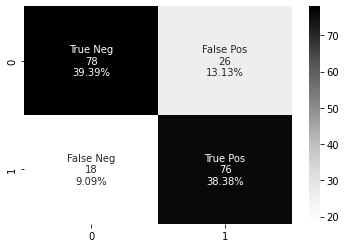

In [38]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_2.flatten()/np.sum(cf_matrix_2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_2, annot=labels, fmt='', cmap='Greys')

## Pregunta 3
Lo mismo que antes pero ahora considerando todos los atributos. Mejora el desempeño? Valdrá la pena usar todos los atributos realmente? argumente en función de las métricas de desempeño.



### Respuesta

In [39]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
score = []
model_NB.fit(X_train,y_train)

GaussianNB()

In [40]:
predicciones_NB = model_NB.predict(X_test)
accuracy_NB = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_NB,
            normalize = True
           )
print(f"El porcentaje de clasificaciones correctas para el NB de todas las variables es: {round(100 * accuracy_NB,2)} %")
score.append(round(100 * accuracy_NB,2))

El porcentaje de clasificaciones correctas para el NB de todas las variables es: 74.24 %


In [41]:
print(classification_report(y_test, predicciones_NB))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       104
           1       0.73      0.72      0.73        94

    accuracy                           0.74       198
   macro avg       0.74      0.74      0.74       198
weighted avg       0.74      0.74      0.74       198



In [42]:
from sklearn.metrics import confusion_matrix
cf_matrix_3 = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones_NB)
print(cf_matrix_3)

[[79 25]
 [26 68]]


<AxesSubplot:>

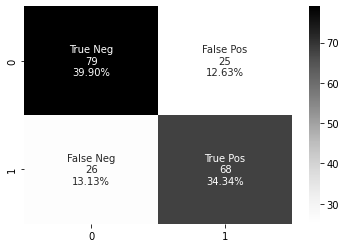

In [43]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_3.flatten()/np.sum(cf_matrix_3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_3, annot=labels, fmt='', cmap='Greys')

## Pregunta 4
Qué ocurre si entrena un árbol de decisión usando todos los atributos. Luego evalúe en el conjunto de prueba generando el classification report. Mejora el desempeño? argumente en función de las métricas de desempeño.
Qué atributos aparecen en el árbol resultante? 

### Respuesta

## Pregunta 5
Entrene un clasificador naive Bayes usando los atributos que aparecen en el árbol de decisión.  Luego evalúe en el conjunto de prueba generando el classification report. Mejora el desempeño al comparar los resultados de las preguntas 1, 2, y 3? argumente en función de las métricas de desempeño.

### Respuesta

## Suerte!